In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


df = pd.read_excel ('Data_Set_Final_LTD_Slope_Intercept (2).xlsx')

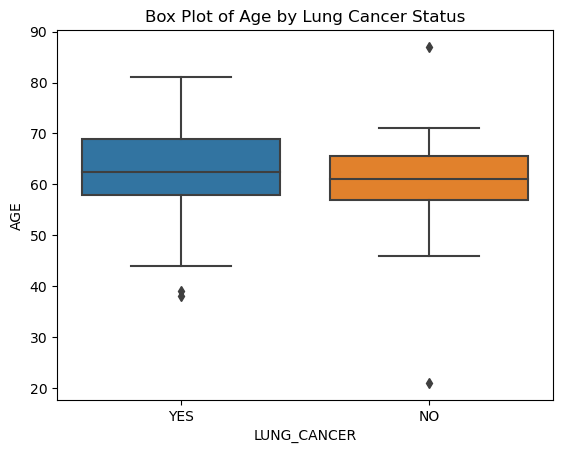

In [19]:
# Box Plot for 'AGE' across lung cancer status
sns.boxplot(x='LUNG_CANCER', y='AGE', data=df_survey)
plt.title('Box Plot of Age by Lung Cancer Status')
plt.show()


### Environmental variables and their relationship with lung cancer incidence


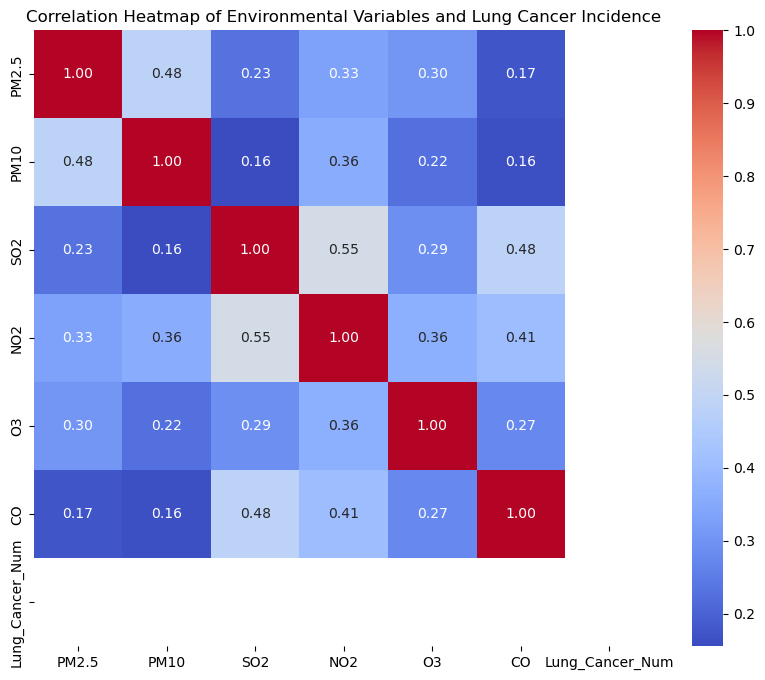

In [24]:
# Assuming 'df' is your DataFrame with the data loaded from the provided Excel file
# List of chosen environmental variables for the correlation matrix
env_variables = ['PM2.5', 'PM10', 'SO2', 'NO2', 'O3', 'CO']

# Add 'Lung Cancer' after converting it to a numeric format
df['Lung_Cancer_Num'] = df['Lung Cancer'].map({'YES': 1, 'NO': 0})

# Now, compute the correlation matrix from the selected environmental variables and lung cancer
correlation_matrix = df[env_variables + ['Lung_Cancer_Num']].corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Environmental Variables and Lung Cancer Incidence')
plt.show()

#### Symptoms and behavior that may have a relationship with lung cancer


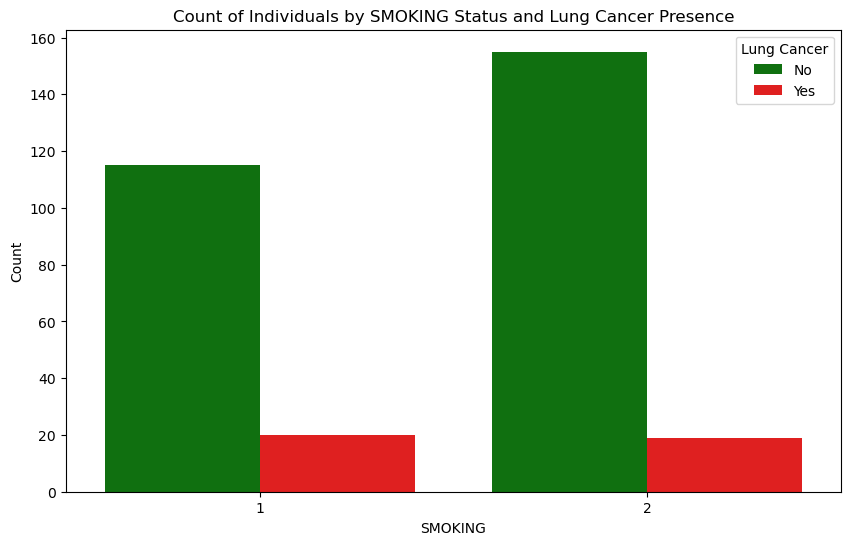

In [34]:

# This is a placeholder actual symptomS
symptom = 'SMOKING' 

# Create a count plot for the symptom column
plt.figure(figsize=(10, 6))
sns.countplot(x=symptom, hue='LUNG_CANCER', data=df_survey, palette=['green', 'red'])
plt.title(f'Count of Individuals by {symptom} Status and Lung Cancer Presence')
plt.xlabel(symptom)
plt.ylabel('Count')
plt.legend(title='Lung Cancer', labels=['No', 'Yes'])
plt.show()


### Trends in air quality over time and their potential impact on lung cancer rates


In [7]:

df_air = pd.read_csv('/Users/moosarahman/Desktop/cs329e/proj/airovertime.csv')
df_air.head()



,Date,PM2.5 AQI Value,Main Pollutant,Site Name,Site ID,Source
0,01/01/2000,152,NaN,Austin Webberville Rd,48-453-0021,AQS
1,01/02/2000,54,NaN,Austin Audubon Society,48-453-0020,AQS
2,01/03/2000,31,NaN,Austin Webberville Rd,48-453-0021,AQS
3,01/04/2000,21,NaN,Austin Webberville Rd,48-453-0021,AQS
4,01/05/2000,56,NaN,Austin Webberville Rd,48-453-0021,AQS


In [16]:
df = pd.read_csv('/Users/moosarahman/Desktop/cs329e/proj/airovertime.csv')  # Adjust the path as needed
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df_yearly_avg = df.groupby('Year')['PM2.5 AQI Value'].mean().reset_index()

# Create an interactive line chart
fig = px.line(df_yearly_avg, x='Year', y='PM2.5 AQI Value', title='Annual Average PM2.5 AQI Trends Over Time', 
              labels={'PM2.5 AQI Value': 'Average PM2.5 AQI Value'},
              markers=True,  # Adds markers to the line
              color_discrete_sequence=['red'])  # Sets the color of the line to red

fig.update_layout(xaxis_title='Year', yaxis_title='Average PM2.5 AQI Value')
fig.update_traces(mode='lines+markers')  # Ensure that both lines and markers are shown

fig.show()
